# Analisi performance classificatore Random Forest

In [1]:
# Import dei pacchetti che mi servono nell'analisi
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Caricamento dei risultati ottenuti nel codice "RandomForest.py"
risultati = np.load("Results/RandomForest.npz", allow_pickle = True)

In [3]:
# Stampo quali sono le keys per averle sott'occhio
for k in risultati.keys():
    print(k)

globConfusionMatrix
globAccuracy
globPrecision
globRecall
globF1
globxROC
globyROC
globAUC
globConfusionMatrixErr
globAccuracyErr
globPrecisionErr
globRecallErr
globF1Err
globxROCErr
globyROCErr
globAUCErr
iperParam_n_estimators
iperParam_criterion
iperParam_min_samples_leaf
iperParam_max_depth


---

### Verifico quale iterazione ha ottenuto il miglior risultato degli Scoring

In [4]:
print(f"Il valore massimo della Accuracy è stato {np.max(risultati['globAccuracy'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globAccuracy']):d}")
print(f"Il valore massimo della Precision è stato {np.max(risultati['globPrecision'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globPrecision']):d}")
print(f"Il valore massimo della Recall è stato {np.max(risultati['globRecall'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globRecall']):d}")
print(f"Il valore massimo della F1 è stato {np.max(risultati['globF1'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globF1']):d}")
print(f"Il valore massimo della AUC è stato {np.max(risultati['globAUC'])*100:.2f} % ed è stato ottenuto all'iterazione {np.argmax(risultati['globAUC']):d}")

Il valore massimo della Accuracy è stato 58.62 % ed è stato ottenuto all'iterazione 278
Il valore massimo della Precision è stato 56.64 % ed è stato ottenuto all'iterazione 35
Il valore massimo della Recall è stato 52.91 % ed è stato ottenuto all'iterazione 81
Il valore massimo della F1 è stato 52.72 % ed è stato ottenuto all'iterazione 278
Il valore massimo della AUC è stato 62.04 % ed è stato ottenuto all'iterazione 278


In [5]:
# Visto che ci sono 3 indici di iterazioni nelle quali gli scoring sono risultati i migliori, vedo ogni scoring se varia di molto tra di esse
iter_1 = 278
iter_2 = 35
iter_3 = 81

print(f"\t\t Iterazione {iter_1} \tIterazione {iter_2} \t\tIterazione {iter_3}" )
print(f"Accuracy:\t {risultati['globAccuracy'][iter_1]*100:.2f} ± {risultati['globAccuracyErr'][iter_1]*100:.2f} % \
       \t{risultati['globAccuracy'][iter_2]*100:.2f} ± {risultati['globAccuracyErr'][iter_2]*100:.2f} % \
       \t{risultati['globAccuracy'][iter_3]*100:.2f} ± {risultati['globAccuracyErr'][iter_3]*100:.2f} % ")
print(f"Precision:\t {risultati['globPrecision'][iter_1]*100:.2f} ± {risultati['globPrecisionErr'][iter_1]*100:.2f} % \
       \t{risultati['globPrecision'][iter_2]*100:.2f} ± {risultati['globPrecisionErr'][iter_2]*100:.2f} % \
       \t{risultati['globPrecision'][iter_3]*100:.2f} ± {risultati['globPrecisionErr'][iter_3]*100:.2f} % ")
print(f"Recall:\t\t {risultati['globRecall'][iter_1]*100:.2f} ± {risultati['globRecallErr'][iter_1]*100:.2f} % \
       \t{risultati['globRecall'][iter_2]*100:.2f} ± {risultati['globRecallErr'][iter_2]*100:.2f} % \
       \t{risultati['globRecall'][iter_3]*100:.2f} ± {risultati['globRecallErr'][iter_3]*100:.2f} % ")
print(f"F1:\t\t {risultati['globF1'][iter_1]*100:.2f} ± {risultati['globF1Err'][iter_1]*100:.2f} % \
       \t{risultati['globF1'][iter_2]*100:.2f} ± {risultati['globF1Err'][iter_2]*100:.2f} % \
       \t{risultati['globF1'][iter_3]*100:.2f} ± {risultati['globF1Err'][iter_3]*100:.2f} % ")
print(f"AUC:\t\t {risultati['globAUC'][iter_1]*100:.2f} ± {risultati['globAUCErr'][iter_1]*100:.2f} % \
       \t{risultati['globAUC'][iter_2]*100:.2f} ± {risultati['globAUCErr'][iter_2]*100:.2f} % \
       \t{risultati['globAUC'][iter_3]*100:.2f} ± {risultati['globAUCErr'][iter_3]*100:.2f} % ")

		 Iterazione 278 	Iterazione 35 		Iterazione 81
Accuracy:	 58.62 ± 0.08 %        	55.61 ± 0.06 %        	55.11 ± 0.14 % 
Precision:	 55.99 ± 0.10 %        	56.64 ± 0.24 %        	51.52 ± 0.17 % 
Recall:		 49.81 ± 0.17 %        	17.71 ± 0.14 %        	52.91 ± 1.66 % 
F1:		 52.72 ± 0.12 %        	26.98 ± 0.16 %        	52.08 ± 0.78 % 
AUC:		 62.04 ± 0.12 %        	59.11 ± 0.08 %        	56.49 ± 0.11 % 


Posso concludere che l'iterazione 278 è la migliore visto che nell'iterazione 35 la Recall e la F1 sono molto basse e nell'iterazione 81 i valori sono molto simili alla 278, però solo in un caso gli scoring sono superiori alla 278

In [6]:
# Definisco quindi il miglior caso: l'iterazione 278
miglior_caso = 278

### Verifico qual era la configurazione dei parametri che ha ottenuto il miglior risultato degli Scoring

In [7]:
print(f"Il numero di alberi nella foresta era: {risultati['iperParam_n_estimators'][miglior_caso]}")
print(f"Il criterio di valutazione era: {risultati['iperParam_criterion'][miglior_caso]}")
print(f"Il minimo numero di pattern per una foglia era: {risultati['iperParam_min_samples_leaf'][miglior_caso]}")
print(f"La massima profondità dell'albero era: {risultati['iperParam_max_depth'][miglior_caso]}")

Il numero di alberi nella foresta era: 300
Il criterio di valutazione era: entropy
Il minimo numero di pattern per una foglia era: 1.0
La massima profondità dell'albero era: 20


---

### Disegno la ROC curve del miglior caso

In [10]:
%matplotlib inline

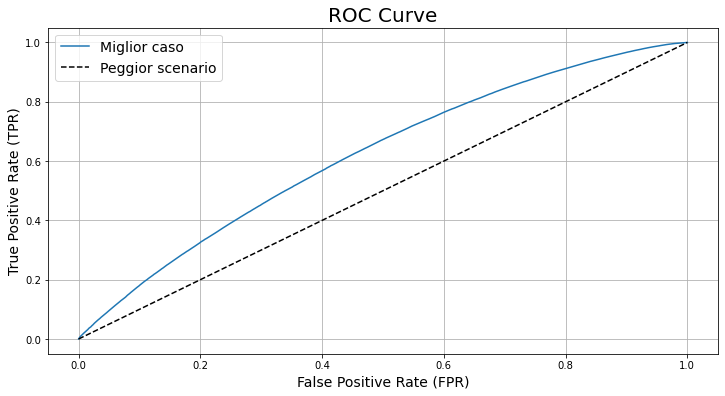

In [11]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("ROC Curve", fontsize = 20)

ax.plot(risultati['globxROC'][:,miglior_caso], risultati['globyROC'][:,miglior_caso], c = "tab:blue", label = "Miglior caso")
ax.plot((0, 1), (0, 1), c = 'k', ls = "--", label = "Peggior scenario")

ax.set_xlabel("False Positive Rate (FPR)", fontsize = 14)
ax.set_ylabel("True Positive Rate (TPR)", fontsize = 14)
ax.legend(fontsize = 14)
ax.grid()
plt.show()

---

### Disegno la Confusion Matrix

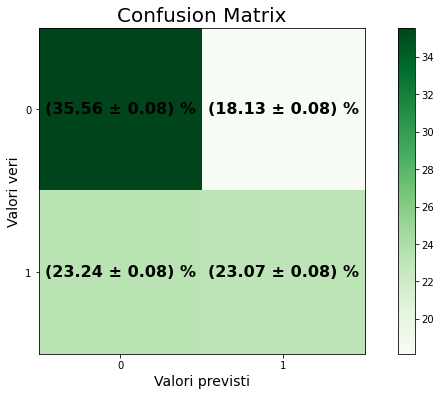

In [12]:
# Calcolo la Matrice di confusione e il suo relativo errore per il plot
ConfusionMat = risultati['globConfusionMatrix'][:,:,miglior_caso]
ConfusionMat_err = risultati['globConfusionMatrixErr'][:,:,miglior_caso]
ConfusionMat_tot = np.sum(ConfusionMat)
ConfusionMat_plot = ConfusionMat / ConfusionMat_tot * 100
ConfusionMat_plot_err = ConfusionMat_err / ConfusionMat_tot * 100


# Plotto la matrice
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Confusion Matrix", fontsize = 20)

im = ax.imshow(ConfusionMat_plot, cmap = "Greens", origin = "upper")
# Disegno la colorbar
fig.colorbar(im)

# Stampo i valori con gli errori
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, f"({ConfusionMat_plot[i, j]:.2f} ± {ConfusionMat_plot_err[i, j]:.2f}) %",
                       ha = "center", va = "center", color = "k", fontsize = 16, weight = "semibold")

# Setto gli assi tra 0 e 1
ax.set_xticks((0,1))
ax.set_yticks((0,1))
ax.set_xlabel("Valori previsti", fontsize = 14)
ax.set_ylabel("Valori veri", fontsize = 14)
plt.show()

---

### Valuto la dipendenza di un parametro rispetto agli scoring ottenuti

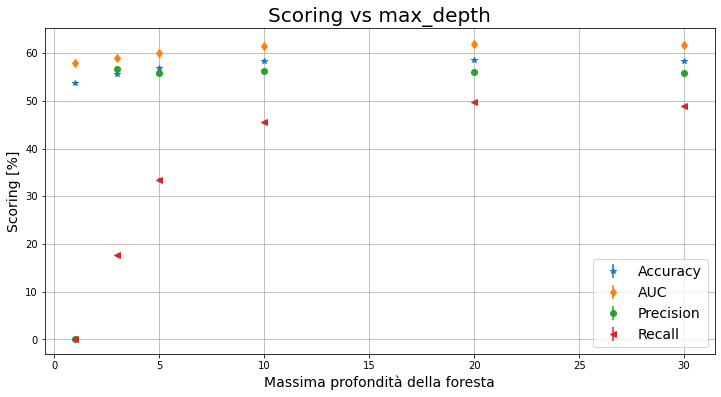

In [97]:
# Creo la condizione per trovare solamente il parametro iperParam_max_depth
cond = ( (risultati["iperParam_criterion"] == risultati["iperParam_criterion"][miglior_caso]) &
         (risultati["iperParam_n_estimators"] == risultati["iperParam_n_estimators"][miglior_caso]) &
          (risultati["iperParam_min_samples_leaf"] == risultati["iperParam_min_samples_leaf"][miglior_caso]) )

# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs max_depth", fontsize = 20)

ax.errorbar(risultati["iperParam_max_depth"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_max_depth"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_max_depth"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_max_depth"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("Massima profondità della foresta", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

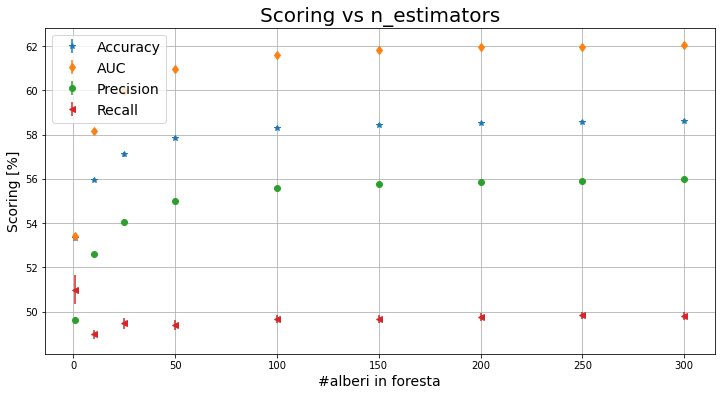

In [98]:
# Creo la condizione per trovare solamente il parametro iperParam_n_estimators
cond = ( (risultati["iperParam_criterion"] == risultati["iperParam_criterion"][miglior_caso]) &
         (risultati["iperParam_max_depth"] == risultati["iperParam_max_depth"][miglior_caso]) &
          (risultati["iperParam_min_samples_leaf"] == risultati["iperParam_min_samples_leaf"][miglior_caso]) )

# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs n_estimators", fontsize = 20)

ax.errorbar(risultati["iperParam_n_estimators"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_n_estimators"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_n_estimators"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_n_estimators"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("#alberi in foresta", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

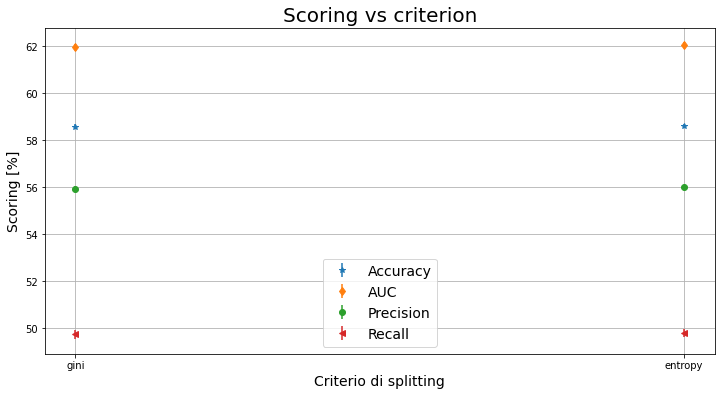

In [99]:
# Creo la condizione per trovare solamente il parametro iperParam_criterion
cond = ( (risultati["iperParam_n_estimators"] == risultati["iperParam_n_estimators"][miglior_caso]) &
         (risultati["iperParam_max_depth"] == risultati["iperParam_max_depth"][miglior_caso]) &
          (risultati["iperParam_min_samples_leaf"] == risultati["iperParam_min_samples_leaf"][miglior_caso]) )

# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs criterion", fontsize = 20)

ax.errorbar(risultati["iperParam_criterion"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_criterion"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_criterion"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_criterion"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("Criterio di splitting", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

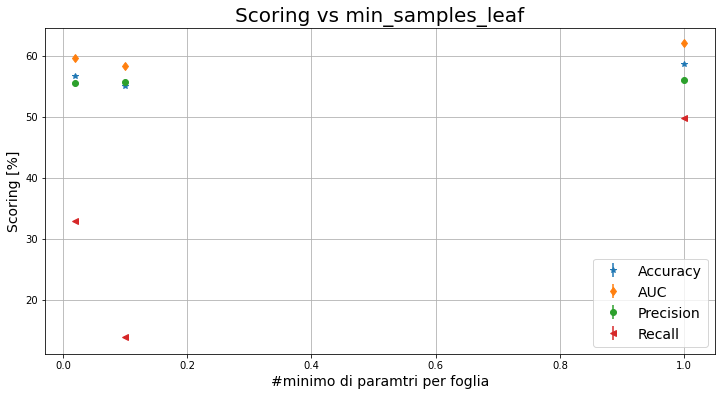

In [100]:
# Creo la condizione per trovare solamente il parametro iperParam_min_samples_leaf
cond = ( (risultati["iperParam_n_estimators"] == risultati["iperParam_n_estimators"][miglior_caso]) &
         (risultati["iperParam_max_depth"] == risultati["iperParam_max_depth"][miglior_caso]) &
          (risultati["iperParam_criterion"] == risultati["iperParam_criterion"][miglior_caso]) )

# Plotto la figura
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Scoring vs min_samples_leaf", fontsize = 20)

ax.errorbar(risultati["iperParam_min_samples_leaf"][cond], risultati["globAccuracy"][cond]*100, yerr = risultati["globAccuracyErr"][cond]*100, ls = "", marker = "*", label = "Accuracy", )
ax.errorbar(risultati["iperParam_min_samples_leaf"][cond], risultati["globAUC"][cond]*100, yerr = risultati["globAUCErr"][cond]*100, ls = "", marker = "d", label = "AUC", )
ax.errorbar(risultati["iperParam_min_samples_leaf"][cond], risultati["globPrecision"][cond]*100, yerr = risultati["globPrecisionErr"][cond]*100, ls = "", marker = "o", label = "Precision", )
ax.errorbar(risultati["iperParam_min_samples_leaf"][cond], risultati["globRecall"][cond]*100, yerr = risultati["globRecallErr"][cond]*100, ls = "", marker = "<", label = "Recall", )

ax.set_xlabel("#minimo di paramtri per foglia", fontsize = 14)
ax.set_ylabel("Scoring [%]", fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()